In [ ]:
import os
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!pip install tensorflowjs

%matplotlib inline

In [ ]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# reshape the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [ ]:
# label encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# build model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

num_classes = 10

model = Sequential()
model.add(Conv2D(8, (5, 5), strides=1, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(16, (5, 5), strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
  shear_range=0.2,
  zoom_range=0.2,
  rotation_range=15,
)


In [10]:
batch_size = 200
epochs = 10

history = model.fit_generator(
  train_datagen.flow(X_train, y_train, batch_size=batch_size),
  steps_per_epoch=len(X_train) // batch_size,
  validation_data=(X_val, y_val),
  validation_steps=len(X_val) // batch_size,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
270/270 [==============================] - ETA: 0s - loss: 0.6822 - accuracy: 0.7980WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f04e30499e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity

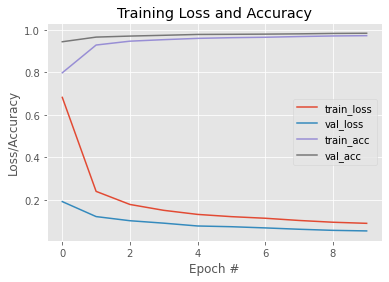

In [11]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [12]:
Y_predict = model.predict(X_test, batch_size=batch_size)
pred_idx = np.argmax(Y_predict, axis=1)

from sklearn.metrics import classification_report

# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), pred_idx, target_names= [str(c) for c in range(10)]))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.98

In [13]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy: {:.4f}".format(scores[1]))

Test accuracy: 0.9848


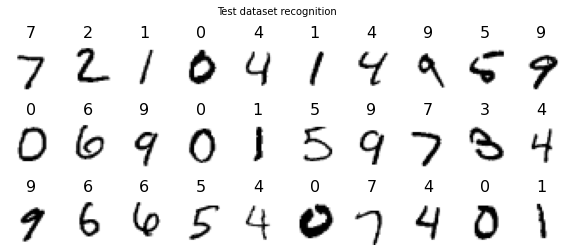

In [14]:
# plot the images in a grid
size = 30
rows = 3
f = plt.figure(figsize=(size // rows, rows + 1))
plt.suptitle("Test dataset recognition", fontsize=10)
for i in range(size):
    sp = f.add_subplot(rows, -(-size // rows), i + 1)
    sp.axis('Off')
    plt.imshow(X_test[i][:,:,0], cmap='gray_r')
    sp.set_title(Y_predict[i].argmax(), fontsize=16)

plt.savefig('test_dataset_recognition.png')

In [19]:

model.save('keras.h5')

In [20]:

%mkdir model

!tensorflowjs_converter --input_format keras keras.h5 model/

In [21]:
# Download model
from google.colab import files
!zip -r model.zip model
files.download('model.zip')

  adding: model/ (stored 0%)
  adding: model/model.json (deflated 76%)
  adding: model/group1-shard1of1.bin (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>